<h2 style="color:purple">Exercise</h2>

Use employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics. 
1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model

In [14]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [15]:
df = pd.read_csv("HR_comma_sep.csv")

print(df.shape)

df.head(10)

(14999, 10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


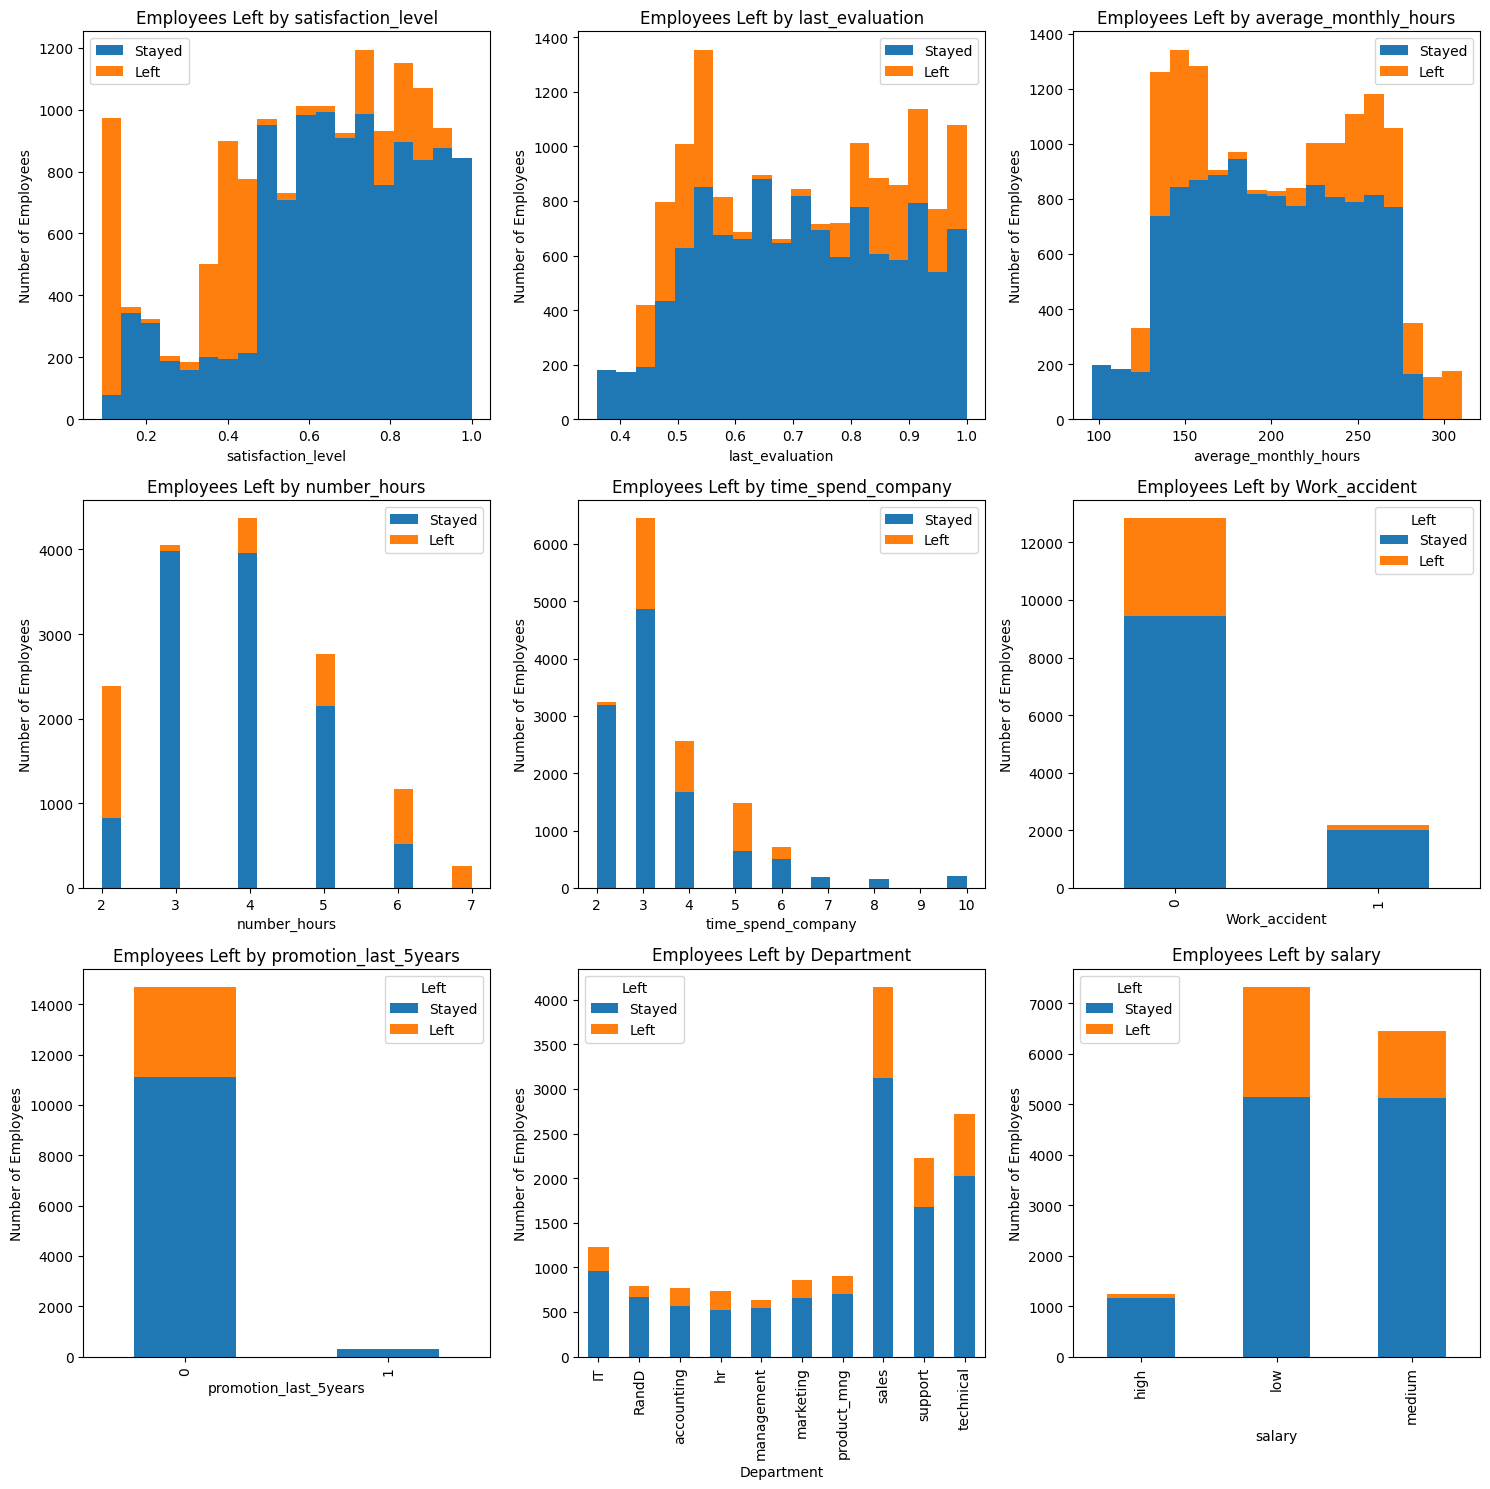

In [37]:
# Correct the column names
df.rename(columns={'average_montly_hours': 'average_monthly_hours', 'number_project': 'number_hours'}, inplace=True)

# Define the colors for the histograms
colors = {'Stayed': '#1f77b4', 'Left': '#ff7f0e'}  # blue, orange

# List of numerical columns for the histograms
numerical_columns = ['satisfaction_level', 'last_evaluation', 'average_monthly_hours', 'number_hours', 'time_spend_company']

# List of categorical columns for the bar charts
categorical_columns = ['Work_accident', 'promotion_last_5years', 'Department', 'salary']

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.ravel()

# Plot histograms for numerical columns
for i, column in enumerate(numerical_columns):
    # Define the bins for the histogram
    bins = np.linspace(df[column].min(), df[column].max(), 20)
    # Plot the histogram for employees who stayed
    stayed_hist = axes[i].hist(df[df['left'] == 0][column], bins=bins, label='Stayed', color=colors['Stayed'])
    # Plot the histogram for employees who left on top of the stayed histogram
    left_hist = axes[i].hist(df[df['left'] == 1][column], bins=bins, label='Left', color=colors['Left'],
                             bottom=stayed_hist[0])  # Use the counts of the 'Stayed' histogram as the bottom
    # Set the title and labels
    axes[i].set_title(f'Employees Left by {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Number of Employees')
    axes[i].legend()

# Plot bar charts for categorical columns
for j, column in enumerate(categorical_columns, start=len(numerical_columns)):
    # Create a bar chart
    counts = df.groupby(column)['left'].value_counts().unstack().fillna(0)
    counts.plot(kind='bar', stacked=True, ax=axes[j], color=[colors['Stayed'], colors['Left']])
    # Set the title and labels
    axes[j].set_title(f'Employees Left by {column}')
    axes[j].set_xlabel(column)
    axes[j].set_ylabel('Number of Employees')
    axes[j].legend(title='Left', labels=['Stayed', 'Left'])

# Hide any unused subplots
for k in range(j+1, len(axes)):
    axes[k].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()

### Based on these charts, all categories seem to have an impact on employee retention. 

#### If an employee has a work accident, it significantly increased their chance of leaving

#### If an employee was promoted in the last 5 years, it significantly decreased their chance of leaving

#### Sales, technical, and support have the highest employee "churn" (sales being #1)

#### High salary employees have the lowest chance of leaving, followed by medium and lastly low salary (who both have significantly higher rates)

#### Employees with a satisfaction level below 0.5 have a higher rate of leaving

#### Employees between a ~0.6 and ~0.8 last evaluation have a lower rate of leaving. Interestingly, employees rated above 0.8 have a decently high rate of leaving (maybe they are being poached by competitors?)

#### Employees with <3 years or >6.5 years at the company have a lower rate of leaving

#### Employees with 3 projects have the lowest rate of leaving

#### Employees working <125 hours or ~175-225 hours have a lower rate of leaving

### These graphs include bar charts showing impact of employee salaries on retention and bar charts showing corelation between department and employee retention

In [25]:
# Now build logistic regression model using variables that were narrowed down in step 1 (aka all the variables)

# first, convert department and salary into dummy columns

dummies_dept = pd.get_dummies(df["Department"])
dummies_dept.head()



,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,True,False,False


In [26]:
dummies_salary = pd.get_dummies(df["salary"])
dummies_salary.head()

,high,low,medium
0,False,True,False
1,False,False,True
2,False,False,True
3,False,True,False
4,False,True,False


In [28]:
merged = pd.concat([df,dummies_dept,dummies_salary],axis='columns')

merged.head()

,satisfaction_level,last_evaluation,number_hours,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,...,hr,management,marketing,product_mng,sales,support,technical,high,low,medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,False,False,False,False,True,False,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,False,False,False,False,True,False,False,False,False,True
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,False,False,False,False,True,False,False,False,False,True
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,False,False,False,False,True,False,False,False,True,False
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,False,False,False,False,True,False,False,False,True,False


In [31]:
# drop 2 dummy variables and the columns they were taken from

final = merged.drop(['Department','accounting','salary','medium'], axis='columns')
final.head()

,satisfaction_level,last_evaluation,number_hours,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,IT,RandD,hr,management,marketing,product_mng,sales,support,technical,high,low
0,0.38,0.53,2,157,3,0,1,0,False,False,False,False,False,False,True,False,False,False,True
1,0.80,0.86,5,262,6,0,1,0,False,False,False,False,False,False,True,False,False,False,False
2,0.11,0.88,7,272,4,0,1,0,False,False,False,False,False,False,True,False,False,False,False
3,0.72,0.87,5,223,5,0,1,0,False,False,False,False,False,False,True,False,False,False,True
4,0.37,0.52,2,159,3,0,1,0,False,False,False,False,False,False,True,False,False,False,True


In [33]:

from sklearn.model_selection import train_test_split

X = final.drop(['left'], axis=1) 
y = final["left"]

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8)

In [34]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
# Measure the accuracy of the model

model.score(X_test,y_test)

0.8003333333333333